# Prediction using Supervised ML
## Author: Arya Chauhan

__This is a case study performed on Titanic dataset, predicting the survival rate of passengers and comparing it with actual result to check the accuracy of algorithm__

>We have first performed Data cleaning, Exploratory data analysis(EDA), Feature Engineering, Dummification and Train-Test Split on the dataset.

>For prediction, we have used 5 algorithms:
>- Logistic Regression 
>- Decision Tree
>- Random Forest
>- Support Vector Machine (SVM)
>- K-Nearest Neighbour (KNN)

### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
#importing necessary libraries

In [2]:
df = pd.read_csv("titanic_train.csv")
df.shape

(891, 12)

__Exploring Data__

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that there are null values in Cabin, Age and Embarked columns

Pre profiling of dataset

In [6]:
from ydata_profiling import ProfileReport
from pathlib import Path

profile = ProfileReport(df, 
                        title="Titanic Dataset", explorative=True
                        )
profile.to_file(Path("Pre-Profile.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

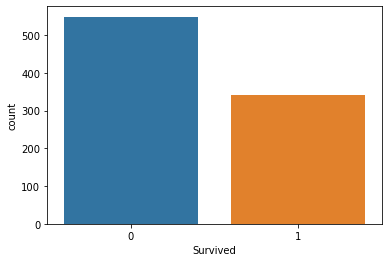

In [7]:
sns.countplot(x='Survived',data=df)
plt.show()

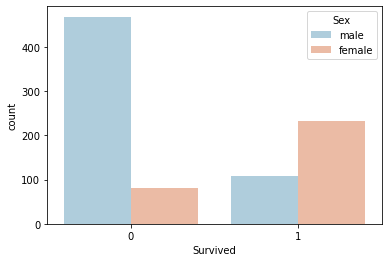

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')
plt.show()

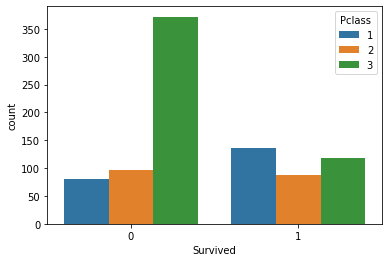

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

In [10]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
df.drop(['Cabin'], axis=1, inplace=True)

In [12]:
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [14]:
type(df.Embarked.mode())

pandas.core.series.Series

In [15]:
df.Embarked.mode()[0]

'S'

In [16]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [17]:
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

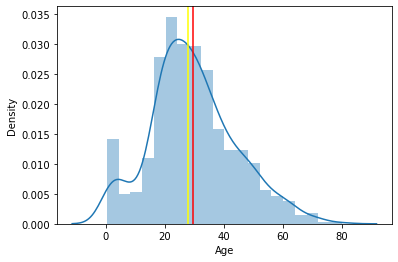

In [18]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(), color='yellow')
plt.show()

In [19]:
df.Age.skew()

0.38910778230082704

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

Since our Age col is failry symmetrical, we will replace missing values in Age col by mean of the col.

In [20]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [21]:
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature Engineering (imp)
It is the process of deriving new and more meaningful columns from existing columns i.e. we are deriving/engineering a column/feature and hence it is called as Feature Engineering.

In [22]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

__Insights__
>As there are sibsp and parch column all of it literally mean the family members of the passenger.
>So, Adding a meaningful column of family size in which here is sibsp and parch plus the passenger

In [23]:
df['FamilySize'] = df.SibSp + df.Parch + 1
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

__Insights__
>Now we can derive a new column using sex and age columns to identify how many children are travelling.

In [24]:
df['GenderClass'] = df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis=1)

In [25]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize GenderClass  
0      0         A/5 21171   7.2500        S           2        male  
1      0          PC 17599  71.2833        C           2      female  
2      0  STON/O2. 3101282   7.9250        S           1      female  
3      0            113803  53.1000        S           2      female  
4      0            373450   8.0500        S           1        male

In [26]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [27]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize GenderClass  
0      0         A/5 21171   7.2500        S           2        male  
1      0          PC 17599  71.2833        C           2      female  
2      0  STON/O2. 3101282   7.9250        S           1      female  
3      0            113803  53.1000        S           2      female  
4      0            373450   8.0500        S           1        male

In [28]:
cor = df.corr()
cor

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.248512  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.091566   -0.248512  
SibSp        0.159651    0.890712  
Parch        0.216225    0.783111  
Fare         1.000000    0.217138  
FamilySize   0.217138    1.000000

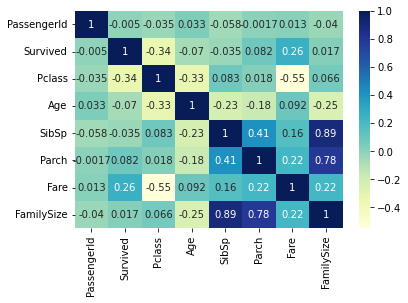

In [29]:
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

__Insights__
> As 'PassengerId','Name','Ticket' columns have no role in analysis, drop them

> While 'SibSp','Parch' columns have multicollinearity with 'FamilySize' column, drop it.

> Similarly 'Sex' col have multicollinearity with GenderClass col, so drop it

In [31]:
df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [32]:
df.head()

Survived  Pclass   Age     Fare Embarked  FamilySize GenderClass
0         0       3  22.0   7.2500        S           2        male
1         1       1  38.0  71.2833        C           2      female
2         1       3  26.0   7.9250        S           1      female
3         1       1  35.0  53.1000        S           2      female
4         0       3  35.0   8.0500        S           1        male

## Dummification
It converts categorical data into dummy or indicator variables.

In [33]:
# Dummification / One Hot Encoding
df = pd.get_dummies(df, columns=['GenderClass','Embarked'], drop_first=True)
df.head(3)

Survived  Pclass   Age     Fare  FamilySize  GenderClass_female  \
0         0       3  22.0   7.2500           2                   0   
1         1       1  38.0  71.2833           2                   1   
2         1       3  26.0   7.9250           1                   1   

   GenderClass_male  Embarked_Q  Embarked_S  
0                 1           0           1  
1                 0           0           0  
2                 0           0           1

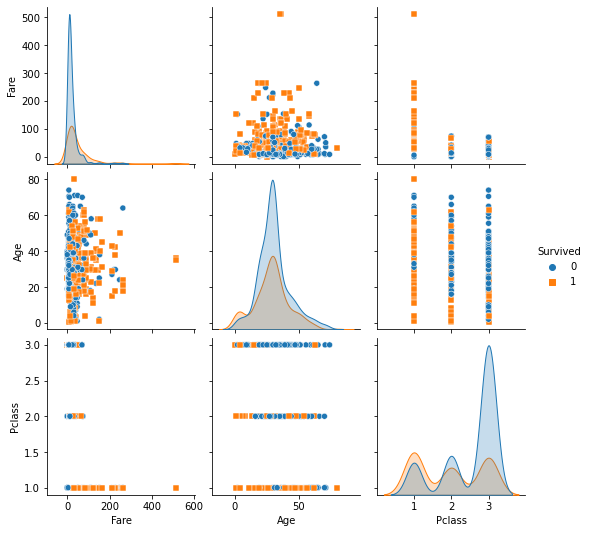

In [34]:
sns.pairplot(df[["Fare","Age","Pclass","Survived"]], vars=["Fare","Age","Pclass"], 
             hue='Survived', markers=['o','s'])
plt.show()

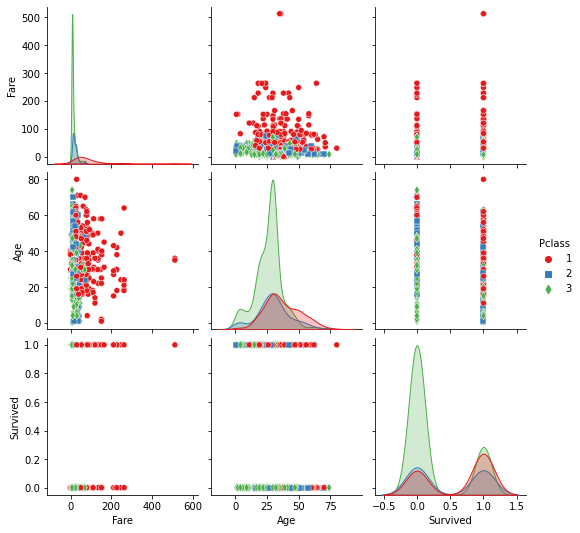

In [35]:
sns.pairplot(df[["Fare","Age","Pclass","Survived"]], vars=["Fare","Age","Survived"], 
             hue='Pclass', markers=['o','s','d'], palette='Set1')
plt.show()

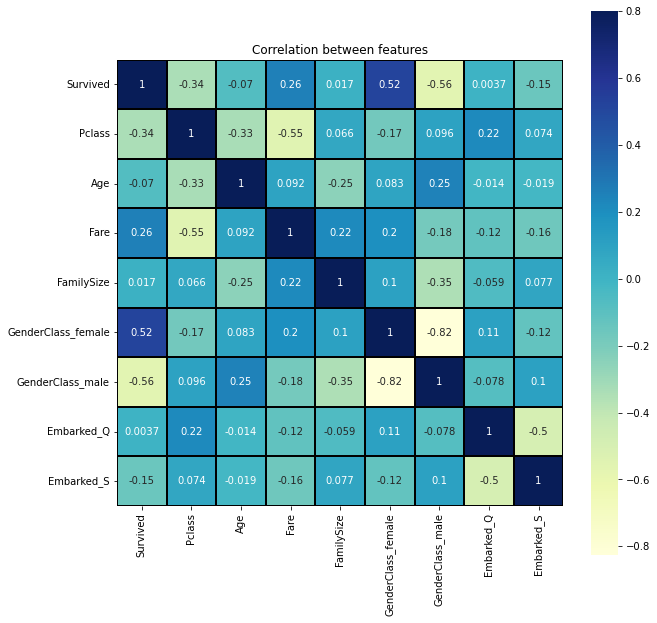

In [36]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, linecolor='black', cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

In [37]:
X = df.loc[:,df.columns != 'Survived']
X.head(3)

Pclass   Age     Fare  FamilySize  GenderClass_female  GenderClass_male  \
0       3  22.0   7.2500           2                   0                 1   
1       1  38.0  71.2833           2                   1                 0   
2       3  26.0   7.9250           1                   1                 0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1

In [38]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Train test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [40]:
df.shape

(891, 9)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [42]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'GenderClass_female',
       'GenderClass_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
X_train_sub = X_train
X_train_sub.head()

Pclass        Age     Fare  FamilySize  GenderClass_female  \
301       3  29.699118  23.2500           3                   0   
309       1  30.000000  56.9292           1                   1   
516       2  34.000000  10.5000           1                   1   
120       2  21.000000  73.5000           3                   0   
570       2  62.000000  10.5000           1                   0   

     GenderClass_male  Embarked_Q  Embarked_S  
301                 1           1           0  
309                 0           0           0  
516                 0           0           1  
120                 1           0           1  
570                 1           0           1

In [44]:
X_test_sub = X_test
X_test_sub.head()

Pclass        Age     Fare  FamilySize  GenderClass_female  \
862       1  48.000000  25.9292           1                   1   
223       3  29.699118   7.8958           1                   0   
84        2  17.000000  10.5000           1                   1   
680       3  29.699118   8.1375           1                   1   
535       2   7.000000  26.2500           3                   0   

     GenderClass_male  Embarked_Q  Embarked_S  
862                 0           0           1  
223                 1           0           1  
84                  0           0           1  
680                 0           1           0  
535                 0           0           1

### Scaling the categorical data

In [45]:
features_to_be_scaled = ['Age', 'Fare']
features_to_be_scaled

['Age', 'Fare']

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sub[['Age','Fare']] = sc.fit_transform(X_train_sub[['Age','Fare']])
X_test_sub[['Age','Fare']] = sc.transform(X_test_sub[['Age','Fare']])

In [47]:
X_train_sub.head()

Pclass       Age      Fare  FamilySize  GenderClass_female  \
301       3 -0.028105 -0.188014           3                   0   
309       1 -0.005412  0.539690           1                   1   
516       2  0.296271 -0.463503           1                   1   
120       2 -0.684200  0.897735           3                   0   
570       2  2.408055 -0.463503           1                   0   

     GenderClass_male  Embarked_Q  Embarked_S  
301                 1           1           0  
309                 0           0           0  
516                 0           0           1  
120                 1           0           1  
570                 1           0           1

# 1. Logistic Regression
Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not.

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_sub, y_train)

LogisticRegression()

In [49]:
logreg

LogisticRegression()

In [50]:
y_pred_train = logreg.predict(X_train_sub)
y_pred_test = logreg.predict(X_test_sub)

In [51]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

Actual  Predicted
0         1          0
1         1          1
2         1          1
3         0          0
4         1          0
..      ...        ...
707       0          0
708       0          1
709       0          0
710       0          1
711       0          0

[712 rows x 2 columns]

In [52]:
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

Actual  Predicted
0         1          1
1         0          0
2         1          1
3         0          1
4         1          1
..      ...        ...
174       1          1
175       0          0
176       0          0
177       0          0
178       1          1

[179 rows x 2 columns]

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
# Accuracy on train data
accuracy_score(y_train, y_pred_train)

0.8342696629213483

In [55]:
# Accuracy on test data
accuracy_score(y_test, y_pred_test)

0.7988826815642458

In [56]:
confusion_matrix(y_test, y_pred_test)

array([[93, 13],
       [23, 50]], dtype=int64)

In [57]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

0   1
0  93  13
1  23  50

In [58]:
cm.index = ['Actual Died', 'Actual Survived']
cm.columns = ['Predicted Died', 'Predicted Survived']
cm

Predicted Died  Predicted Survived
Actual Died                  93                  13
Actual Survived              23                  50

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [60]:
precision_score(y_test, y_pred_test)

0.7936507936507936

In [61]:
recall_score(y_test, y_pred_test)

0.684931506849315

In [62]:
f1_score(y_test, y_pred_test)

0.7352941176470589

In [63]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [64]:
fpr,tpr,thres = roc_curve(y_test, y_pred_test)
print(fpr," || ",tpr," || ",thres)

[0.         0.12264151 1.        ]  ||  [0.         0.68493151 1.        ]  ||  [2 1 0]


In [65]:
print(roc_auc_score(y_test, y_pred_test))


0.7811449987076765


0.7811449987076765


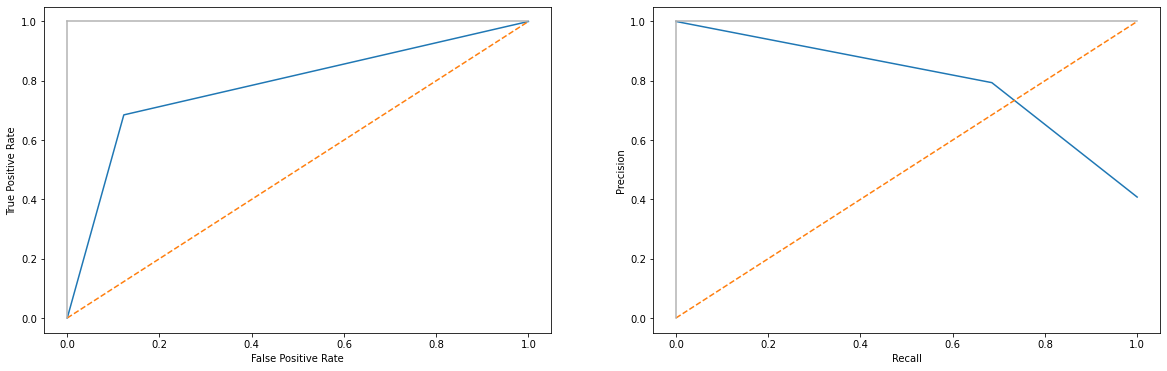

In [66]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

### Setting threshold 

In [67]:
logreg.predict(X_test_sub)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [68]:
logreg.predict_proba(X_test_sub)

array([[0.07677751, 0.92322249],
       [0.93081247, 0.06918753],
       [0.11767741, 0.88232259],
       [0.29771846, 0.70228154],
       [0.22352498, 0.77647502],
       [0.9173384 , 0.0826616 ],
       [0.90261376, 0.09738624],
       [0.07592592, 0.92407408],
       [0.51943252, 0.48056748],
       [0.36580452, 0.63419548],
       [0.92380511, 0.07619489],
       [0.33679041, 0.66320959],
       [0.68968239, 0.31031761],
       [0.81113305, 0.18886695],
       [0.2978502 , 0.7021498 ],
       [0.56566701, 0.43433299],
       [0.71335515, 0.28664485],
       [0.94156498, 0.05843502],
       [0.93927358, 0.06072642],
       [0.4320324 , 0.5679676 ],
       [0.93401884, 0.06598116],
       [0.9176388 , 0.0823612 ],
       [0.03010494, 0.96989506],
       [0.7502649 , 0.2497351 ],
       [0.34023079, 0.65976921],
       [0.92677927, 0.07322073],
       [0.0687904 , 0.9312096 ],
       [0.18767055, 0.81232945],
       [0.79892062, 0.20107938],
       [0.03672796, 0.96327204],
       [0.

#### Setting threshold to 0.75

In [69]:
preds1 = np.where(logreg.predict_proba(X_test_sub)[:,1] > 0.75, 1, 0)
preds1

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [70]:
accuracy_score(y_test, preds1)

0.7318435754189944

#### Setting threshold to 0.25

In [71]:
preds2 = np.where(logreg.predict_proba(X_test_sub)[:,1] > 0.25, 1, 0)
preds2

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1])

In [72]:
accuracy_score(y_test, preds2)

0.7486033519553073

In [73]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [74]:
y_pred_test = logreg.predict_proba(X_test_sub)[:,1]

In [75]:
pred_val = np.where(logreg.predict_proba(X_test_sub)[:,1] > 0.50, 1, 0)

In [76]:
list(zip(y_test, y_pred_test, pred_val))

[(1, 0.9232224930642812, 1),
 (0, 0.06918752798631392, 0),
 (1, 0.8823225899136437, 1),
 (0, 0.7022815435636667, 1),
 (1, 0.7764750168453757, 1),
 (0, 0.08266160375696775, 0),
 (0, 0.0973862372214896, 0),
 (1, 0.9240740830587706, 1),
 (0, 0.4805674757194559, 0),
 (1, 0.6341954811162962, 1),
 (0, 0.0761948876565804, 0),
 (1, 0.6632095943722272, 1),
 (0, 0.3103176091034951, 0),
 (1, 0.18886694632676848, 0),
 (1, 0.7021497997252244, 1),
 (1, 0.4343329926347858, 0),
 (0, 0.2866448531179608, 0),
 (0, 0.05843502283762884, 0),
 (0, 0.060726415572577054, 0),
 (1, 0.5679675983708408, 1),
 (0, 0.06598116061947032, 0),
 (0, 0.08236119847019562, 0),
 (1, 0.969895057667735, 1),
 (0, 0.24973510337402893, 0),
 (0, 0.6597692119047379, 1),
 (1, 0.07322073342205204, 0),
 (1, 0.9312096005246839, 1),
 (1, 0.812329453034242, 1),
 (0, 0.20107937879422172, 0),
 (1, 0.9632720386465528, 1),
 (0, 0.6836068156687429, 1),
 (1, 0.4266854447720722, 0),
 (0, 0.1836825714556928, 0),
 (0, 0.5938417765854749, 1),
 (0, 

In [77]:
cutoff_df = pd.DataFrame(zip(y_test, y_pred_test, pred_val), columns=[
                         'Actual', 'Predicted_Prob', 'Predicted'])
cutoff_df

Actual  Predicted_Prob  Predicted
0         1        0.923222          1
1         0        0.069188          0
2         1        0.882323          1
3         0        0.702282          1
4         1        0.776475          1
..      ...             ...        ...
174       1        0.921638          1
175       0        0.414601          0
176       0        0.088073          0
177       0        0.104817          0
178       1        0.559860          1

[179 rows x 3 columns]

In [78]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i] = cutoff_df.Predicted_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df.head()

Actual  Predicted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       1        0.923222          1    1    1    1    1    1    1    1    1   
1       0        0.069188          0    1    0    0    0    0    0    0    0   
2       1        0.882323          1    1    1    1    1    1    1    1    1   
3       0        0.702282          1    1    1    1    1    1    1    1    1   
4       1        0.776475          1    1    1    1    1    1    1    1    1   

   0.8  0.9  
0    1    1  
1    0    0  
2    1    0  
3    0    0  
4    0    0

In [79]:
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [80]:
cutoff_df1

prob  accuracy     sensi     speci
0.0   0.0  0.407821  1.000000  0.000000
0.1   0.1  0.620112  0.849315  0.462264
0.2   0.2  0.698324  0.821918  0.613208
0.3   0.3  0.787709  0.808219  0.773585
0.4   0.4  0.804469  0.739726  0.849057
0.5   0.5  0.798883  0.684932  0.877358
0.6   0.6  0.782123  0.602740  0.905660
0.7   0.7  0.754190  0.452055  0.962264
0.8   0.8  0.726257  0.342466  0.990566
0.9   0.9  0.675978  0.219178  0.990566

<IPython.core.display.Javascript object>


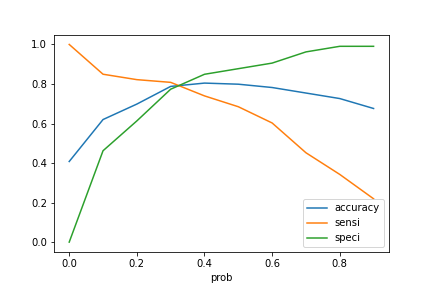

In [81]:
# Let's plot it as well
%matplotlib notebook
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [82]:
preds3 = np.where(logreg.predict_proba(X_test_sub)[:,1] > 0.35, 1, 0)
preds3

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1])

In [83]:
accuracy_score(y_test, preds3)

0.8044692737430168

In [84]:
preds4 = np.where(logreg.predict_proba(X_train_sub)[:,1] > 0.35, 1, 0)
preds4

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [85]:
accuracy_score(y_train, preds4)

0.8089887640449438

### Final Result of Logistic Regression
### Accuracy of train dataset is 0.809
### Accuracy of test dataset is 0.804

# 2. Decision Tree 
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

## Model1

In [86]:
from sklearn.tree import DecisionTreeClassifier
DTmodel1 = DecisionTreeClassifier(random_state=0)
DTmodel1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

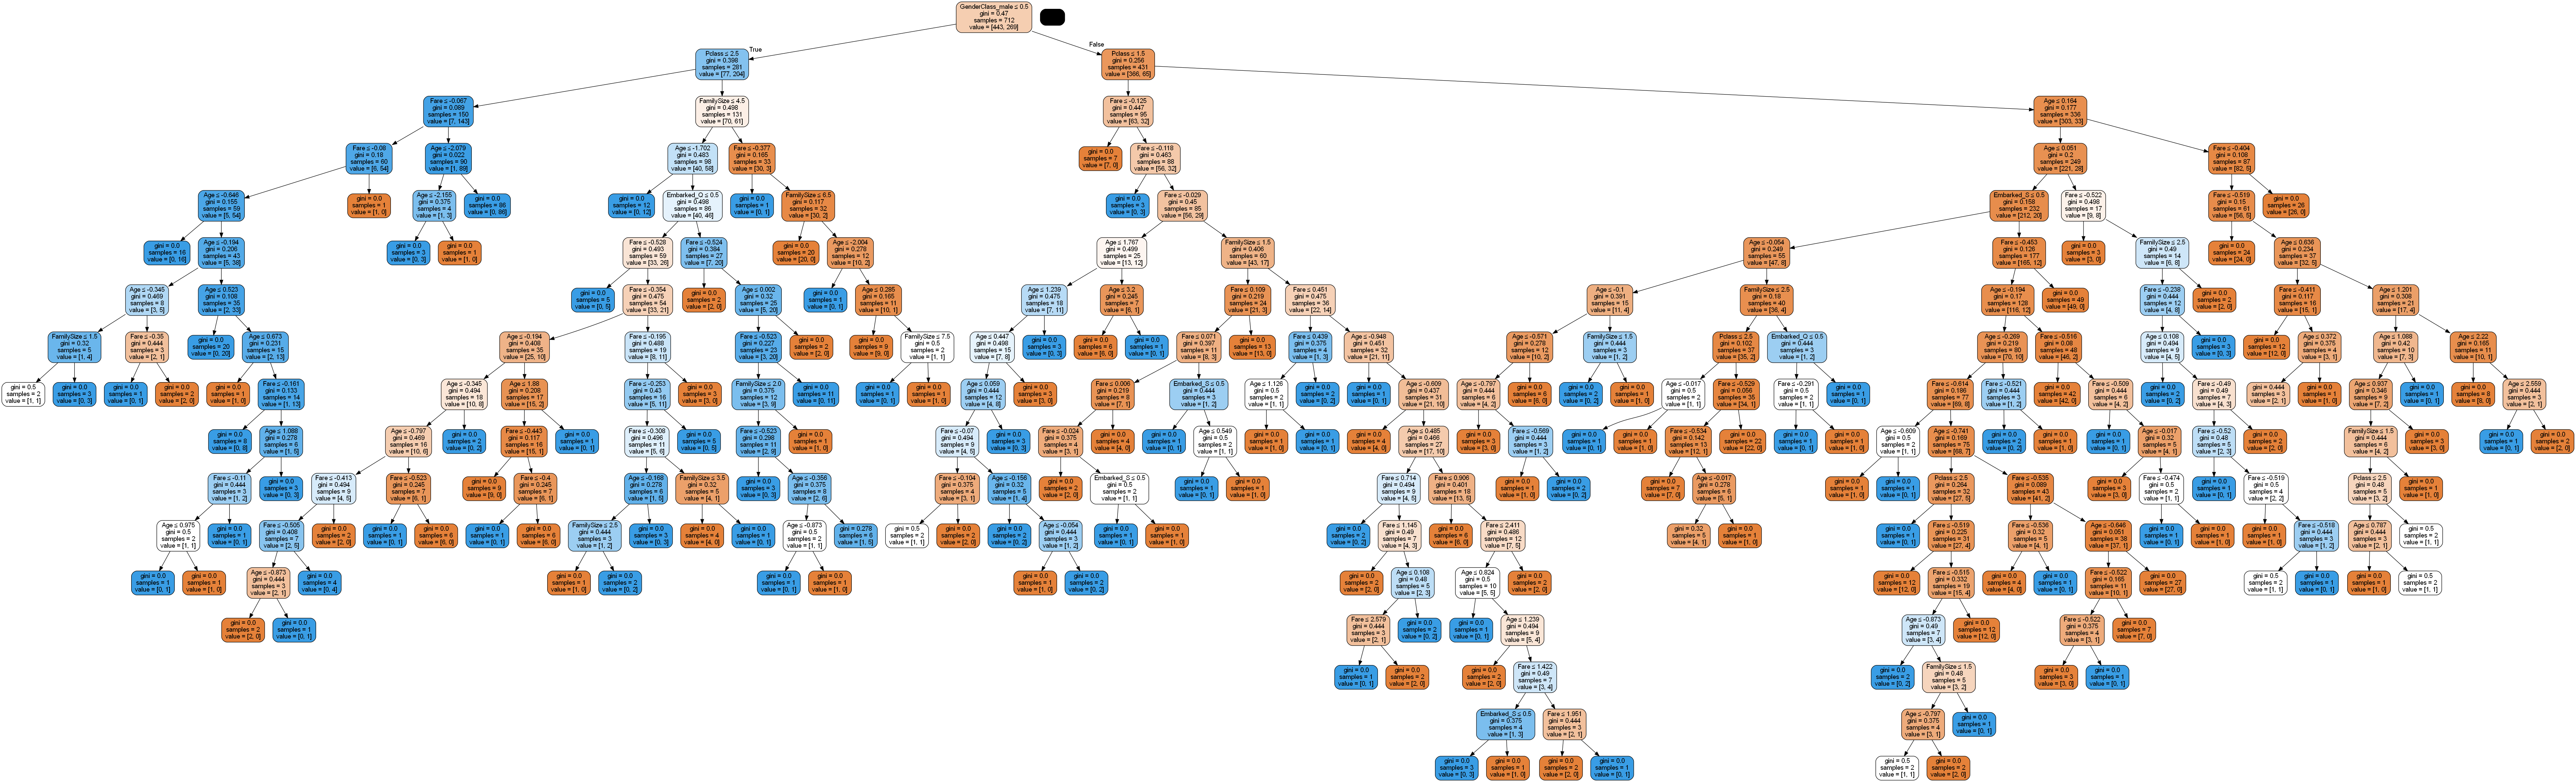

In [87]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image # To generate image using pydot file

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=DTmodel1,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

In [88]:
from sklearn import tree
print(tree.export_graphviz(DTmodel1))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[5] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]"] ;
1 [label="X[0] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= -0.067\ngini = 0.089\nsamples = 150\nvalue = [7, 143]"] ;
1 -> 2 ;
3 [label="X[2] <= -0.08\ngini = 0.18\nsamples = 60\nvalue = [6, 54]"] ;
2 -> 3 ;
4 [label="X[1] <= -0.646\ngini = 0.155\nsamples = 59\nvalue = [5, 54]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 16\nvalue = [0, 16]"] ;
4 -> 5 ;
6 [label="X[1] <= -0.194\ngini = 0.206\nsamples = 43\nvalue = [5, 38]"] ;
4 -> 6 ;
7 [label="X[1] <= -0.345\ngini = 0.469\nsamples = 8\nvalue = [3, 5]"] ;
6 -> 7 ;
8 [label="X[3] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
7 -> 8 ;
9 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 10 ;
11 [label="X[2] <= -0

In [89]:
y_pred_train = DTmodel1.predict(X_train)
y_pred_test = DTmodel1.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
# Train Accuracy
accuracy_score(y_train, y_pred_train)

0.9873595505617978

In [92]:
# Test Accuracy
accuracy_score(y_test, y_pred_test)

0.7821229050279329

### Model1 is Overfitting as there is a difference of more than 5% between the Training and Testing Accuracy.

## Model2

In [93]:
from sklearn.tree import DecisionTreeClassifier
DTmodel2 = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTmodel2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

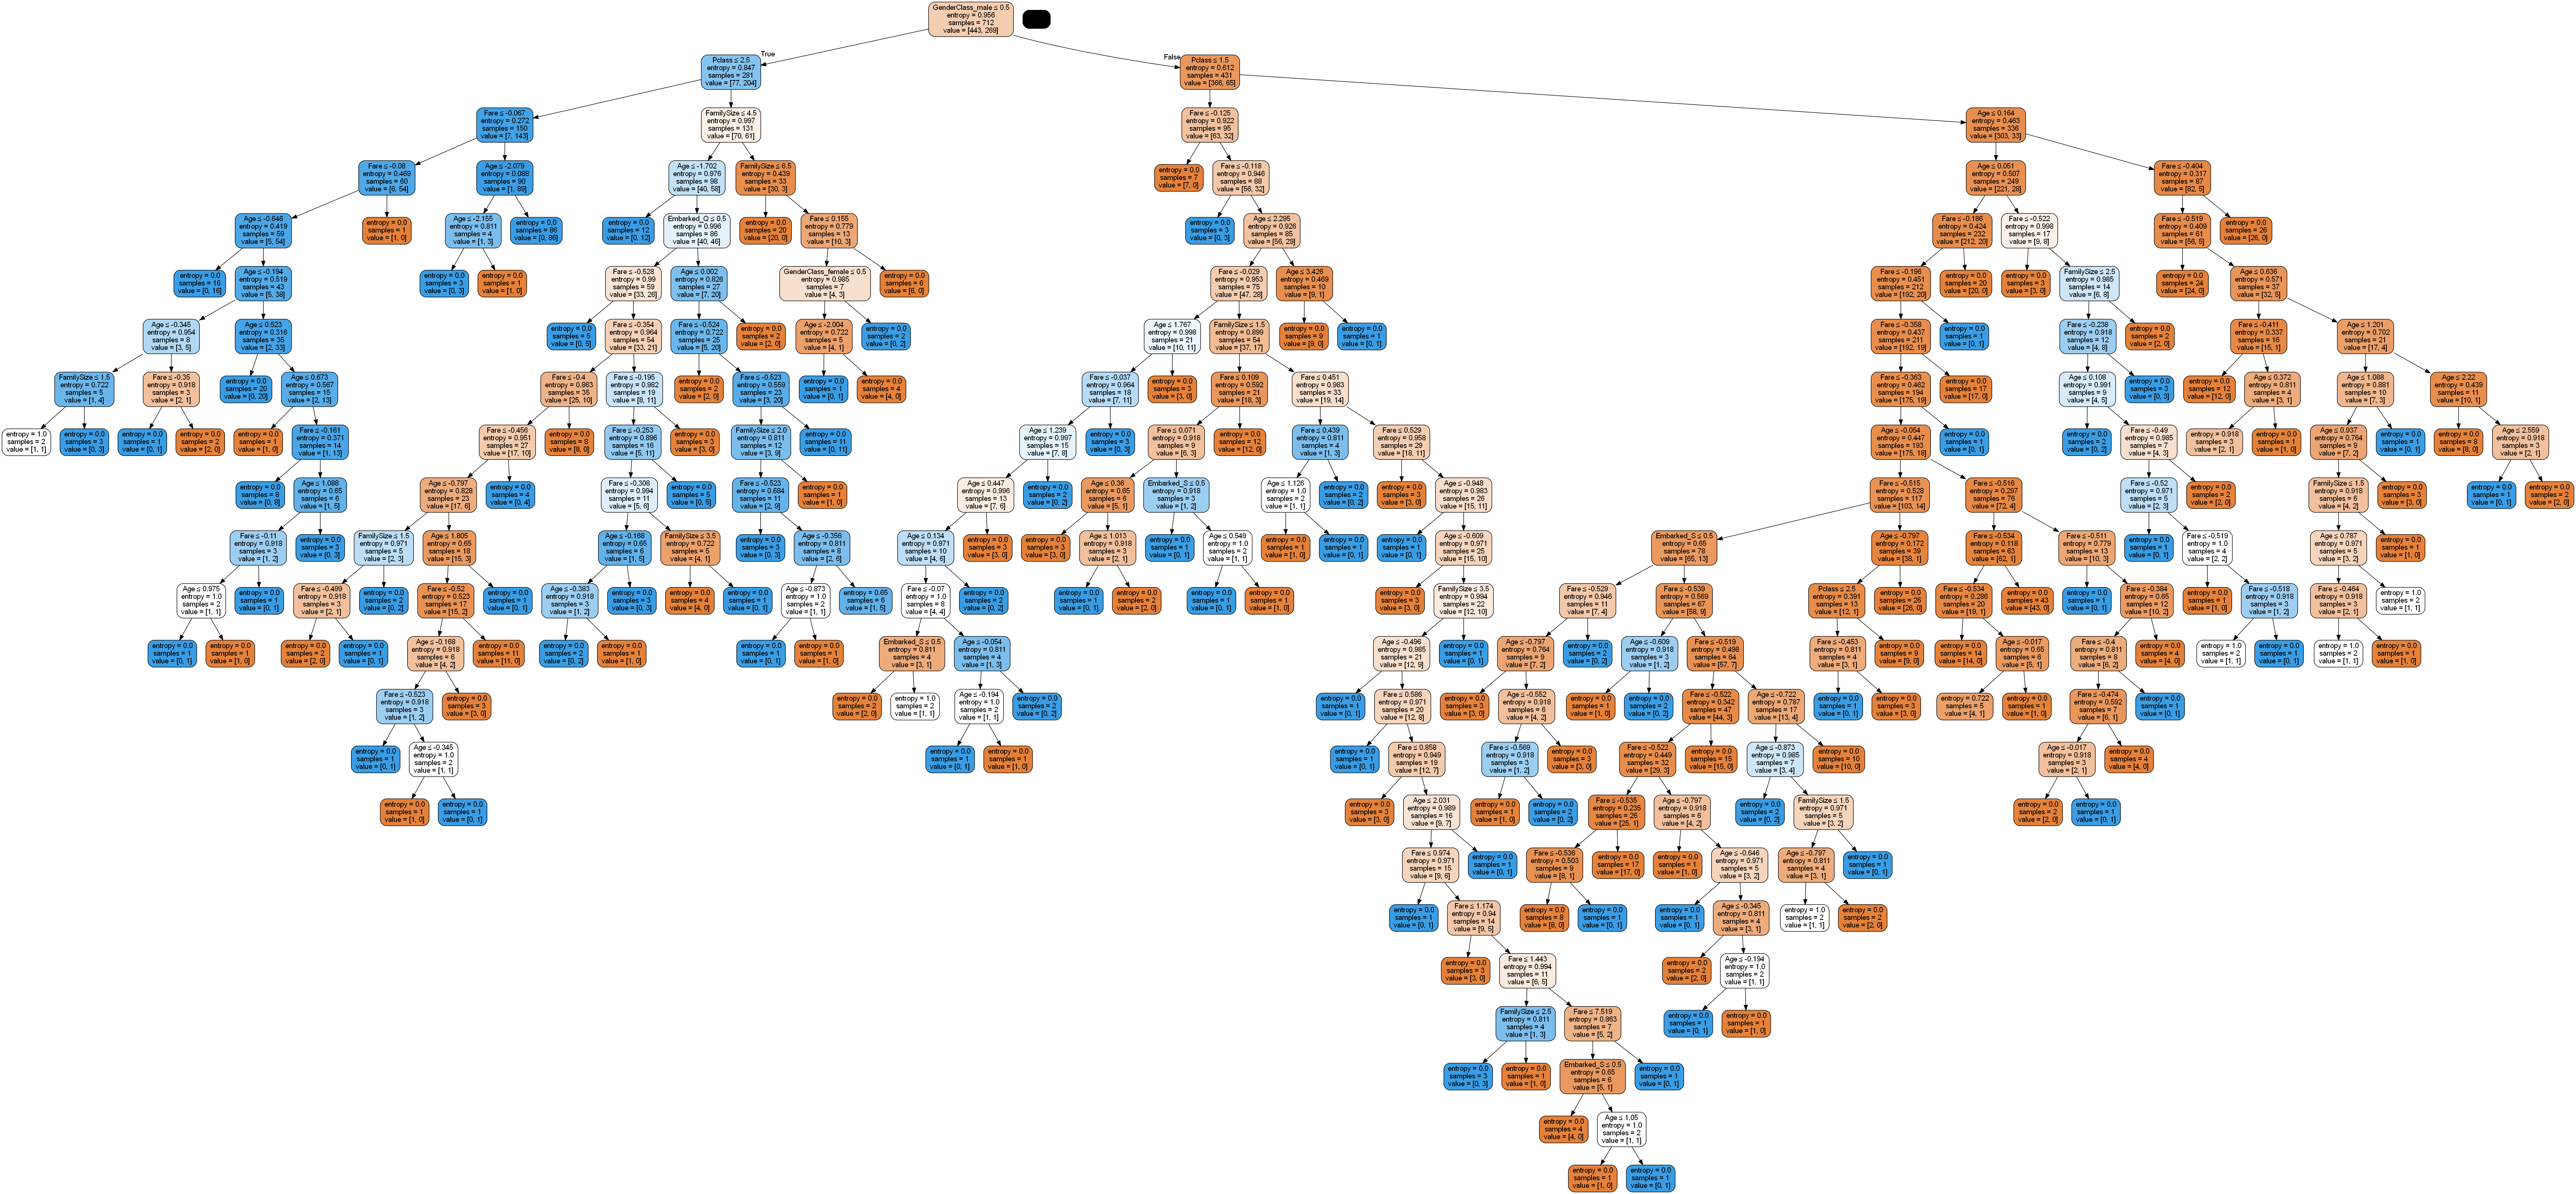

In [94]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image # To generate image using pydot file

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=DTmodel2,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

In [95]:
y_pred_train = DTmodel2.predict(X_train)
y_pred_test = DTmodel2.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
# Train Accuracy
accuracy_score(y_train, y_pred_train)

0.9873595505617978

In [98]:
# Test Accuracy
accuracy_score(y_test, y_pred_test)

0.7653631284916201

### Model2 is Overfitting as there is a difference of more than 5% between the Training and Testing Accuracy.

## Model3

In [99]:
from sklearn.tree import DecisionTreeClassifier
DTmodel3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)
DTmodel3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

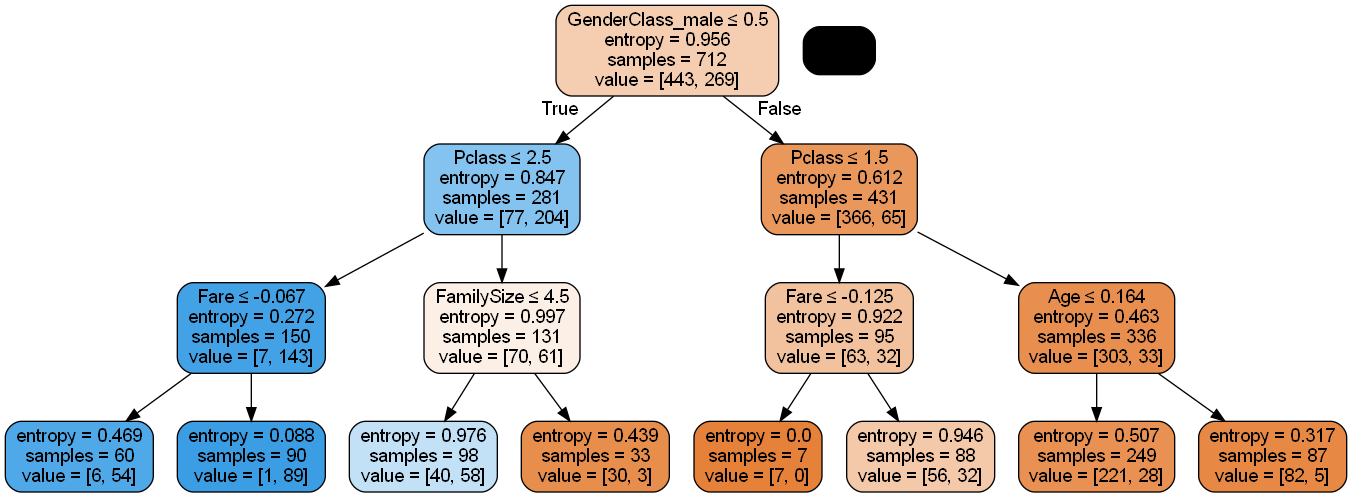

In [100]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image # To generate image using pydot file

# Generate a pydot file
dot_tree = export_graphviz(decision_tree=DTmodel3,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names=X.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

In [101]:
y_pred_train = DTmodel3.predict(X_train)
y_pred_test = DTmodel3.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
# Train Accuracy
accuracy_score(y_train, y_pred_train)

0.8384831460674157

In [104]:
# Test Accuracy
accuracy_score(y_test, y_pred_test)

0.8044692737430168

## Model3 is good as there is a difference of less than 5% between the Training and Testing Accuracy.

### Final Result of Decision Tree
### Accuracy of train dataset is 0.838
### Accuracy of test dataset is 0.804

# 3. Random Forest Classifier

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. 

Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state=0)
rfc1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [111]:
rfc1

RandomForestClassifier(random_state=0)

In [112]:
y_pred_train = rfc1.predict(X_train)
y_pred_test = rfc1.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
# Train and Testing Accuracy
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9873595505617978, 0.7653631284916201)

### Model is Overfitting.

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[93, 13],
       [29, 44]], dtype=int64)

In [129]:
param_dist = {
    "n_estimators" : [100,1730],
    "criterion" : ['gini','entropy'],
    "max_depth" : [7,8,9,10,None],
    "min_samples_split":[5,6,7],
    "min_samples_leaf":[5,6,7],
    "max_features":['auto'],
    "oob_score":[True],
    "random_state":[0,1,42],
    "n_jobs":[-1],
    "verbose":[1]
}
param_dist

{'n_estimators': [100, 1730],
 'criterion': ['gini', 'entropy'],
 'max_depth': [7, 8, 9, 10, None],
 'min_samples_split': [5, 6, 7],
 'min_samples_leaf': [5, 6, 7],
 'max_features': ['auto'],
 'oob_score': [True],
 'random_state': [0, 1, 42],
 'n_jobs': [-1],
 'verbose': [1]}

### RandomizedSearchCV
To reduce to workload 

In [130]:
from sklearn.model_selection import RandomizedSearchCV
rscv1 = RandomizedSearchCV(estimator=rfc1, param_distributions=param_dist, 
                           cv=10, n_jobs=-1, verbose=True)
rscv1.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [7, 8, 9, 10, None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [5, 6, 7],
                                        'min_samples_split': [5, 6, 7],
                                        'n_estimators': [100, 1730],
                                        'n_jobs': [-1], 'oob_score': [True],
                                        'random_state': [0, 1, 42],
                                        'verbose': [1]},
                   verbose=True)

In [131]:
rscv1.best_params_

{'verbose': 1,
 'random_state': 42,
 'oob_score': True,
 'n_jobs': -1,
 'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'entropy'}

In [132]:
rscv1.best_score_

0.8483763693270735

In [133]:
y_pred_test = rscv1.predict(X_test)
y_pred_train = rscv1.predict(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [134]:
accuracy_score(y_train, y_pred_train)

0.8623595505617978

In [135]:
accuracy_score(y_test, y_pred_test)

0.7821229050279329

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

### Final Result of Random Forest
### Accuracy of train dataset is 0.862
### Accuracy of test dataset is 0.782

# 4. Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [137]:
from sklearn.svm import SVC

svclss = SVC()
svclss.fit(X_train, y_train)

y_pred = svclss.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[95 11]
 [25 48]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.81      0.66      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



### Final Result of SVM
### Accuracy of test dataset is 0.80

# 5. K-Nearest Neighbour (KNN)
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [143]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_sub, y_train)

KNeighborsClassifier()

In [145]:
y_pred = classifier.predict(X_test_sub)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [146]:
print(accuracy_score(y_test, y_pred))

0.7653631284916201


In [147]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[96 10]
 [32 41]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       106
           1       0.80      0.56      0.66        73

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179



### Final Result of KNN
### Accuracy of test dataset is 0.77